In [1]:
import torch
from torch import nn


In [2]:
# Device agnostic code
device = "cuda" if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [3]:
device = 'mps'

In [4]:
import requests
import zipfile
from pathlib import Path
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

#If image folde doesn't  exist download it and prepare it

if image_path.is_dir():
    print (f"{image_path} directory already exist, skipping download")
else:
    print(f'{image_path} doesnt exist, creating one' )
    image_path.mkdir(parents=True, exist_ok=True)

#Making file and filling it with download content
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:  #Creating file pizza_steak_sushi || wb - write permission
    requests = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print ("Downloading")
    f.write(requests.content) #Writes dowloaded ti a file in with open string

 
#Unzip pizza steak sushi dataset
with zipfile.ZipFile(data_path/'pizza_steak_sushi.zip', "r") as zip_ref:
    print("Unzipping")
    zip_ref.extractall(image_path)





data/pizza_steak_sushi directory already exist, skipping download
Downloading
Unzipping


In [5]:
image_path

PosixPath('data/pizza_steak_sushi')

In [6]:
#Becoming one with data

import os 

def walk_through_dir(path):
    for dirpath, dirnames, filenames in os.walk(path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} files in {dirpath}")
        
        

In [7]:
walk_through_dir(image_path)

There are 2 directories and 1 files in data/pizza_steak_sushi
There are 3 directories and 1 files in data/pizza_steak_sushi/test
There are 0 directories and 19 files in data/pizza_steak_sushi/test/steak
There are 0 directories and 31 files in data/pizza_steak_sushi/test/sushi
There are 0 directories and 25 files in data/pizza_steak_sushi/test/pizza
There are 3 directories and 1 files in data/pizza_steak_sushi/train
There are 0 directories and 75 files in data/pizza_steak_sushi/train/steak
There are 0 directories and 72 files in data/pizza_steak_sushi/train/sushi
There are 0 directories and 78 files in data/pizza_steak_sushi/train/pizza


In [8]:
train_dir = image_path/"train"
test_dir = image_path/"test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

In [9]:
#Visualize the images
import random
from PIL import Image



# Get all images paths
# Pick a random image using random.choice()
# Get image class name using pathlib.Path.parent.stem
# Open image using PIL
# Show image metadata
image_path_list = list(image_path.glob('*/*/*.jpg'))
image_path_list


[PosixPath('data/pizza_steak_sushi/test/steak/296375.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/673127.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/894825.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/1868005.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/27415.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/1016217.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/1285886.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/502076.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/3424937.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/690177.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/354513.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/2117351.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/100274.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/2144308.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/966174.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/1882831.jpg'),
 PosixPath('data/pizza_steak_sushi

In [10]:
random_image_path = random.choice(image_path_list)
random_image_path
    

PosixPath('data/pizza_steak_sushi/test/sushi/858157.jpg')

In [11]:
image_class = random_image_path.parent.stem
image_class

'sushi'

In [12]:
img = Image.open(random_image_path)

random image path: data/pizza_steak_sushi/test/sushi/858157.jpg
random_image class: sushi
image height: 288
image width: 512


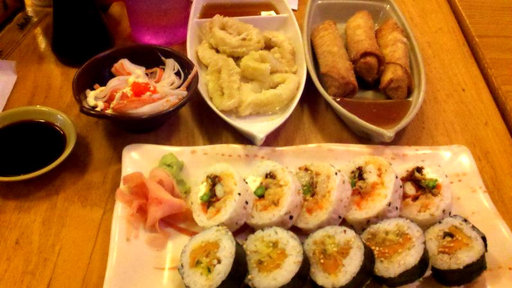

In [13]:
print(f'random image path: {random_image_path}')
print(f'random_image class: {image_class}')
print(f'image height: {img.height}')
print(f'image width: {img.width}')
img

(-0.5, 511.5, 287.5, -0.5)

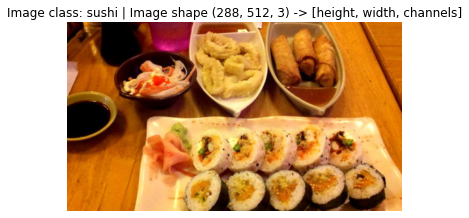

In [14]:
import numpy as np
import matplotlib.pyplot as plt
# Show image with matplotlib
image_as_array = np.asarray(img)

plt.figure(figsize=(6,8))
plt.imshow(image_as_array)
plt.title(f'Image class: {image_class} | Image shape {image_as_array.shape} -> [height, width, channels]')
plt.axis(False)

Turning images into Torch tensors format


turn images into torch.utils.data.Dataset and subsequently to torch.utils.data.DataLoader we'll call it Dataset and DataLoader



In [15]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


Transforming data with torchvision.transforms

In [16]:
data_transform = transforms.Compose([transforms.Resize(size=(64,64)),
                                     transforms.RandomHorizontalFlip(p=0.5),
                                     transforms.ToTensor()])

In [17]:
data_transform(img=img).shape

torch.Size([3, 64, 64])

In [18]:
data_transform(img)

tensor([[[0.2000, 0.2431, 0.1804,  ..., 0.8353, 0.8275, 0.8196],
         [0.1608, 0.1804, 0.1373,  ..., 0.8157, 0.8078, 0.7961],
         [0.1882, 0.1137, 0.1608,  ..., 0.8118, 0.8039, 0.7961],
         ...,
         [0.8667, 0.8745, 0.8588,  ..., 0.8745, 0.9216, 0.9725],
         [0.8667, 0.8706, 0.8510,  ..., 0.9059, 0.9569, 0.9922],
         [0.8745, 0.8667, 0.8588,  ..., 0.9529, 0.9882, 0.9922]],

        [[0.0353, 0.0314, 0.0431,  ..., 0.4392, 0.4392, 0.4392],
         [0.0275, 0.0118, 0.0314,  ..., 0.4196, 0.4157, 0.4078],
         [0.0275, 0.0039, 0.0510,  ..., 0.4157, 0.4078, 0.4039],
         ...,
         [0.4510, 0.4588, 0.4392,  ..., 0.5490, 0.6118, 0.6706],
         [0.4549, 0.4510, 0.4314,  ..., 0.6039, 0.6706, 0.7098],
         [0.4667, 0.4510, 0.4392,  ..., 0.6863, 0.7176, 0.7412]],

        [[0.0078, 0.0078, 0.0078,  ..., 0.0196, 0.0039, 0.0078],
         [0.0078, 0.0078, 0.0078,  ..., 0.0118, 0.0078, 0.0118],
         [0.0078, 0.0039, 0.0118,  ..., 0.0118, 0.0118, 0.

Visualising transfored image

In [34]:
def plot_transformed_images(image_paths:list, transform, n=3, seed=None):
    if seed:
        random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows=1, ncols=2)
            ax[0].imshow(f)
            ax[0].axis(False)
            ax[0].set_title(f'Original\nSize: {f.size}')

            #Transform and plot target image
            transformed_image = transform(f).permute(1, 2, 0) #changing shape for matplotlib (C, H, W) -> (H, W, C)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f'Transformed\nSize: {transformed_image.shape}')
            ax[1].axis(False)

            fig.suptitle(f'Class: {image_path.parent.stem}', fontsize=16)



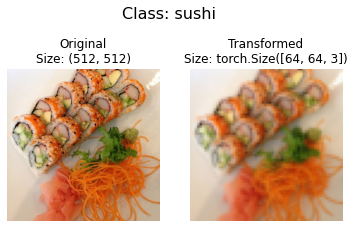

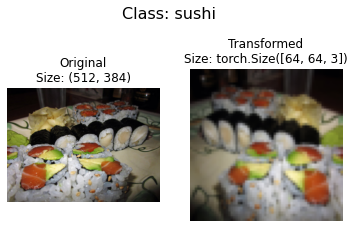

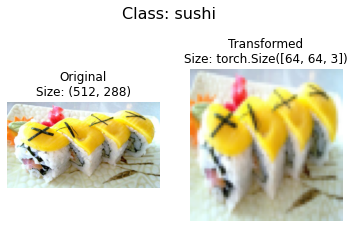

In [38]:
plot_transformed_images(image_paths=image_path_list, transform=data_transform,
                        n=3, seed=46)

In [ ]:
20:58